# Sandbox

## Clustering 3 classifications

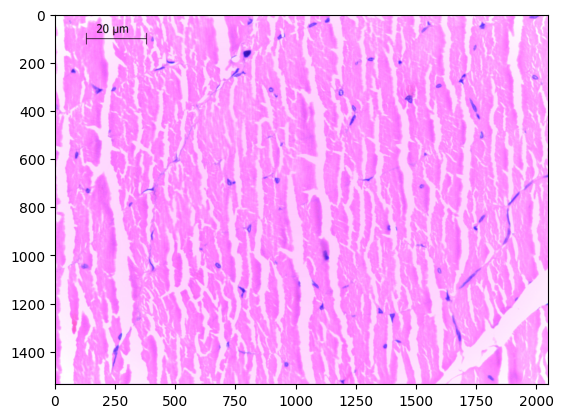

In [9]:
# Load image as an array of pixels

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('RawData/Rato1FDControle7.jpg')

# Display image
plt.imshow(img)
plt.show()

In [10]:
from sklearn.cluster import KMeans

# Reshape
X = img.reshape(-1, 3)

#KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(X)

# Predict
y_kmeans = kmeans.predict(X)

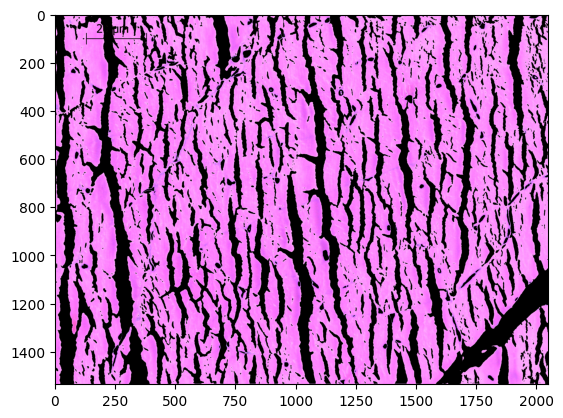

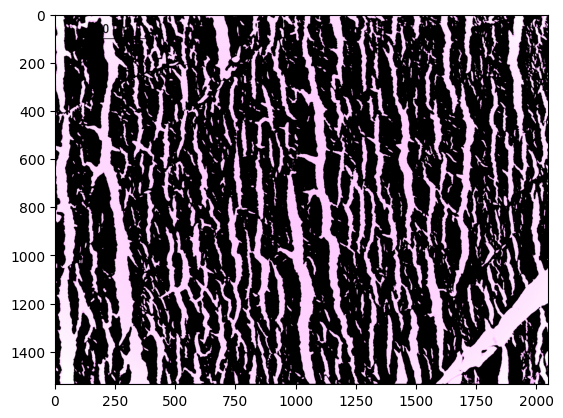

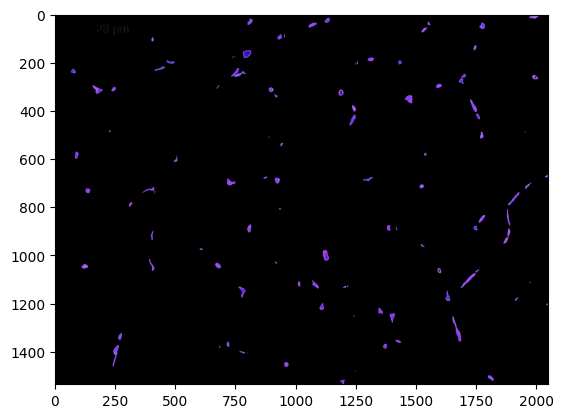

In [11]:
for i in range(0, num_clusters):
    img_compressed = X.copy()
    img_compressed[y_kmeans != i] = [0, 0, 0]
    img_compressed = img_compressed.reshape(img.shape)

    plt.imshow(img_compressed)
    plt.show()

### Counting each class

In [12]:
import pandas as pd

# Store the number of pixels in each cluster
df = pd.DataFrame()
df['cluster'] = y_kmeans
df['cluster'].value_counts() / len(df)

cluster
0    0.680387
1    0.310196
2    0.009417
Name: count, dtype: float64

## Método do Cotovelo

In [34]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    
    return wcss

In [35]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 16, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [36]:
wcss = calculate_wcss(X)
n = optimal_number_of_clusters(wcss)
print(n)

7


In [37]:
from sklearn.cluster import KMeans

# Reshape
X = img.reshape(-1, 3)

#KMeans
kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

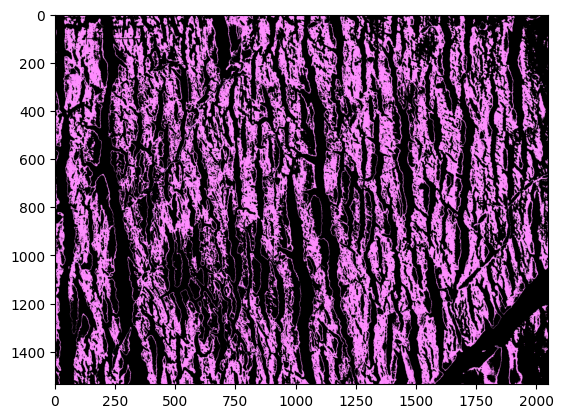

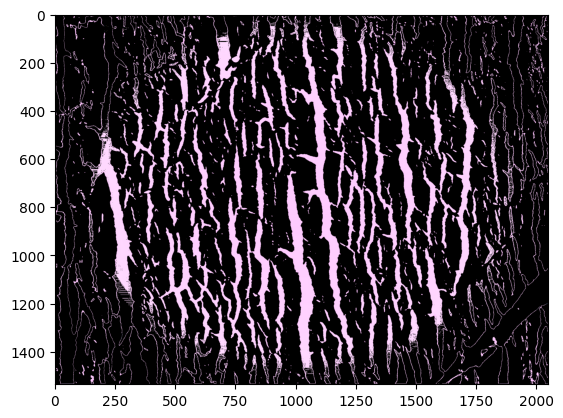

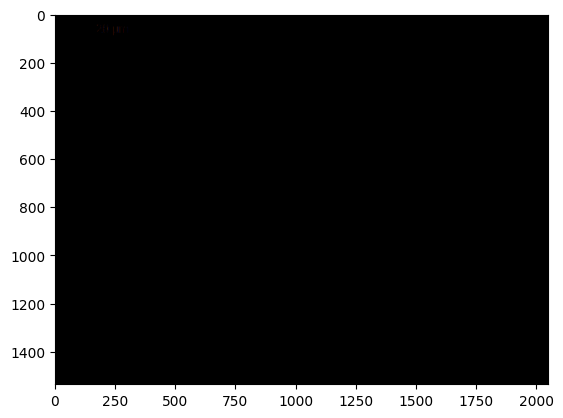

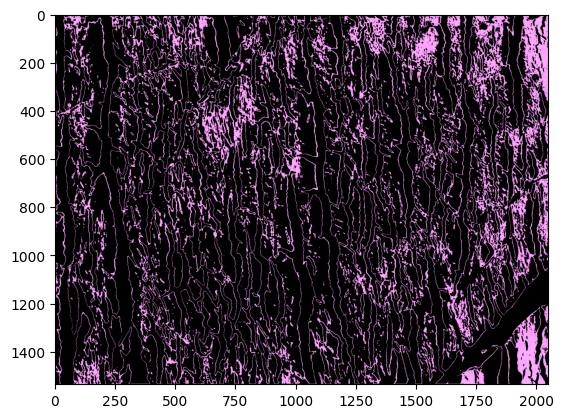

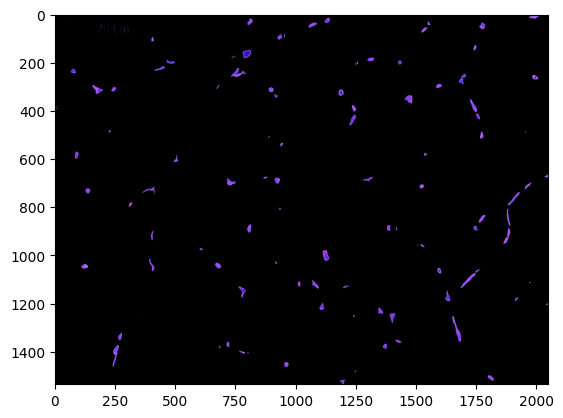

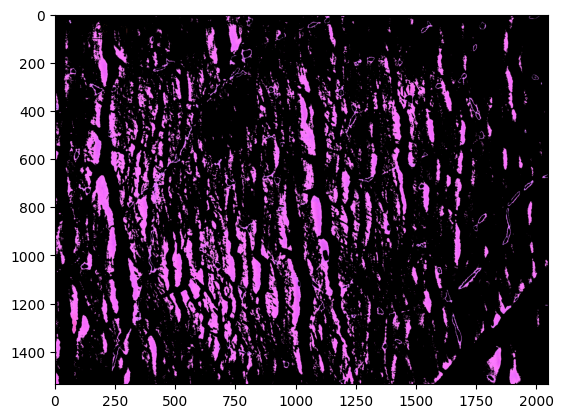

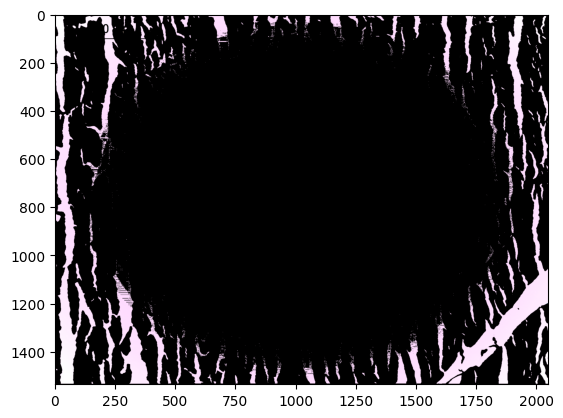

In [38]:
images = []

for i in range(0, n):
    images.append(X.copy())
    images[i][y_kmeans != i] = [0, 0, 0]
    images[i] = images[i].reshape(img.shape)

    plt.imshow(images[i])
    plt.show()

## Crop testing

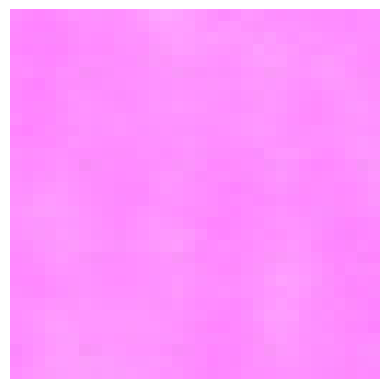

NameError: name 'kmeans' is not defined

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

img = 'RawData/Rato1FDControle7.jpg'

image = Image.open(img)
new_size = 32
width, height = image.size
n_sample = 10

for i in range(n_sample):
    # Crop the image to random 16x16 frame
    left = np.random.randint(0, width - new_size)
    top = np.random.randint(0, height - new_size)
    right = left + new_size
    bottom = top + new_size

    cropped_image = image.crop((left, top, right, bottom))

    # Show cropped image without axis
    plt.imshow(cropped_image)
    plt.axis('off')
    plt.show()
    
    sample_prediction = kmeans.predict(np.array(cropped_image).reshape(-1, 3))

    # Count the percentage of pixels in each cluster
    df = pd.DataFrame()
    df['cluster'] = sample_prediction
    print(df['cluster'].value_counts() / len(df))

# K-Means Model

## Model creation and data fit

In [69]:
# Load all images inside /training folder and reshape them
from PIL import Image
import numpy as np
import os

folder = 'training/'

X = []

for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = img.resize((512, 512))
        img = np.array(img)
        X.append(img)

X = np.array(X)
X = X.reshape(-1, 3)

In [70]:
from sklearn.cluster import KMeans

#KMeans
cluster_num = 3
kmeans_model = KMeans(n_clusters=cluster_num, random_state=1)

kmeans_model.fit(X)

KMeans(n_clusters=3, random_state=1)

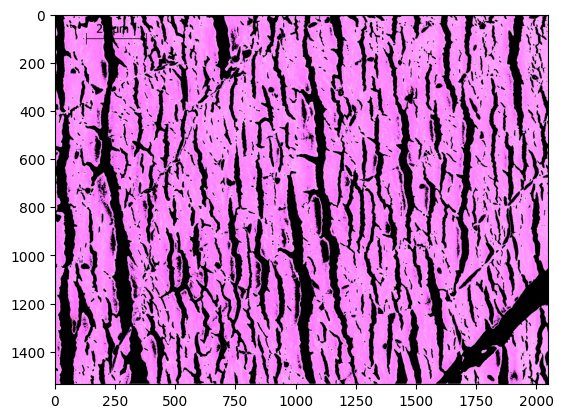

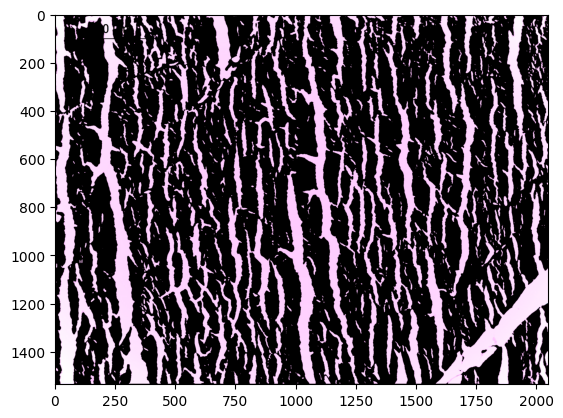

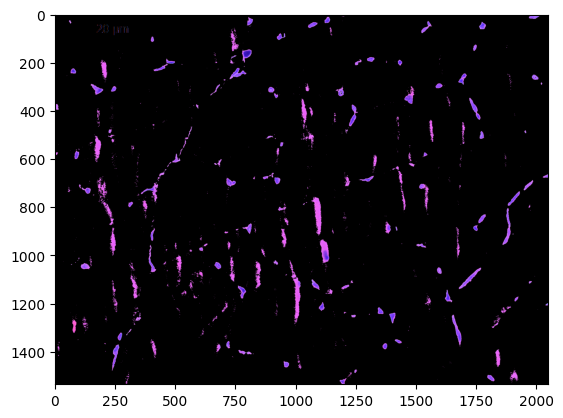

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('RawData/Rato1FDControle7.jpg')
validation_img = img.reshape(-1, 3)

# Show clusters and black pixels that are not in the cluster
y_kmeans = kmeans_model.predict(validation_img)

for i in range(0, cluster_num):
    img_compressed = validation_img.copy()
    img_compressed[y_kmeans != i] = [0, 0, 0]
    img_compressed = img_compressed.reshape(img.shape)

    plt.imshow(img_compressed)
    plt.show()


## Samples

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os

# img random image from RawData folder
img = random.choice(os.listdir('RawData/'))
img = 'RawData/' + img

image = Image.open(img)
new_size = 32
width, height = image.size
n_sample = 10

for i in range(n_sample):
    # Crop the image to random 16x16 frame
    left = np.random.randint(0, width - new_size)
    top = np.random.randint(0, height - new_size)
    right = left + new_size
    bottom = top + new_size

    cropped_image = image.crop((left, top, right, bottom))

    # Show cropped image without axis
    plt.imshow(cropped_image)
    plt.axis('off')
    plt.show()
    
    sample_prediction = kmeans_model.predict(np.array(cropped_image).reshape(-1, 3))

    # Count the percentage of pixels in each cluster
    df = pd.DataFrame()
    df['cluster'] = sample_prediction
    print(df['cluster'].value_counts() / len(df))

## Validation

In [72]:
from PIL import Image
import pandas as pd
import numpy as np

folder = 'validation/especialista/'

especialista = []
for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = np.array(img)
        img = img.reshape(-1, 3)

        # Count black pixels
        black = (img == [0, 0, 0]).all(axis=1).sum()
        total = len(img)

        print(f"{filename}: {black / total}")
        especialista.append(black / total)


1.jpg: 0.464193124316067
2.jpg: 0.9167382730737876
3.jpg: 0.131630936905575
4.jpg: 0.6716387218072722
5.jpg: 0.11591424857338005
6.jpg: 0.5912853166472044
7.jpg: 0.5334567166809879
8.jpg: 1.0
9.jpg: 0.0
10.jpg: 0.0


In [73]:
from PIL import Image
import pandas as pd
import numpy as np

folder = 'validation/especialista/'

kmeans_ans = []
for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = np.array(img)
        img = img.reshape(-1, 3)

        # Kmeans
        y_kmeans = kmeans_model.predict(img)

        # Append the percentage of class 1
        print(f"{filename}: {(y_kmeans == 2).sum() / len(y_kmeans)}")
        kmeans_ans.append((y_kmeans == 2).sum() / len(y_kmeans))

1.jpg: 0.5116957131630937
2.jpg: 0.9285845432980075
3.jpg: 0.20118829914586409
4.jpg: 0.8959540543914924
5.jpg: 0.18956970057505454
6.jpg: 0.6402273778835349
7.jpg: 0.6629945432245651
8.jpg: 1.0
9.jpg: 0.0
10.jpg: 0.17225196642210325


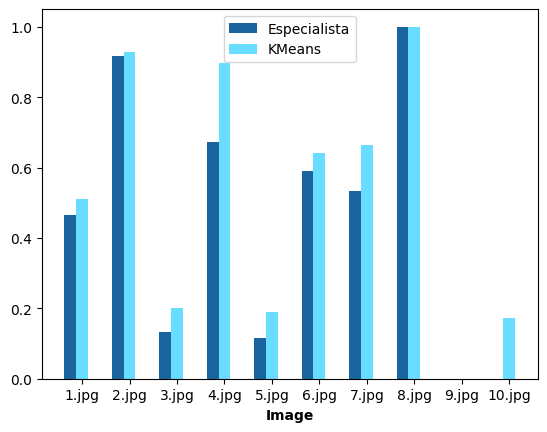

In [55]:
especialista = np.array(especialista)
kmeans_ans = np.array(kmeans_ans)

# Grouped bar chart of especialista and kmeans
import matplotlib.pyplot as plt

barWidth = 0.25
r1 = np.arange(len(especialista))
r2 = [x + barWidth for x in r1]

plt.bar(r1, especialista, color='#1A659E', width=barWidth, label='Especialista')
plt.bar(r2, kmeans_ans, color='#69DDFF', width=barWidth, label='KMeans')

plt.xlabel('Image', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(especialista))], os.listdir(folder))
plt.legend()
plt.show()

In [62]:
print(especialista)

[0.46419312 0.91673827 0.13163094 0.67163872 0.11591425 0.59128532
 0.53345672 1.         0.         0.        ]


In [63]:
print(kmeans_ans)

[0.51169571 0.92858454 0.2011883  0.89595405 0.1895697  0.64022738
 0.66299454 1.         0.         0.17225197]


Metricas

In [65]:
# Accuracy of KMeans compared to Especialista
from sklearn.metrics import r2_score

print(f"R2: {r2_score(especialista, kmeans_ans)}")

R2: 0.9078885424756273


## Speed Test

In [82]:
# Speed test
import time

start = time.time()

# Predict all images inside /speedtesting
folder = 'speedtesting/'

for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = np.array(img)
        img = img.reshape(-1, 3)

        y_kmeans = kmeans_model.predict(img)
        print(y_kmeans)

end = time.time()

print(f"Time: {end - start}")

[2 2 0 ... 1 1 1]
[1 1 1 ... 0 0 0]
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[0 0 0 ... 2 2 2]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 0 0]
[1 1 1 ... 1 0 0]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 1 1]
[0 0 0 ... 1 1 1]
[2 2 0 ... 1 1 1]
[1 1 1 ... 1 1 1]
[0 0 2 ... 2 2 2]
[1 1 1 ... 0 0 0]
Time: 2.6967926025390625


## Model persistence

In [88]:
# Save the model
import pickle

filename = 'kmeans_model.sav'
pickle.dump(kmeans_model, open(filename, 'wb'))

# Mini Batch K-Means

In [86]:
# Load all images inside /training folder and reshape them
from PIL import Image
import numpy as np
import os

folder = 'training/'

X = []

for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = img.resize((512, 512))
        img = np.array(img)
        X.append(img)

X = np.array(X)
X = X.reshape(-1, 3)

In [87]:
# Mini batch KMeans
from sklearn.cluster import MiniBatchKMeans

#KMeans
cluster_num = 3
mini_kmeans_model = MiniBatchKMeans(n_clusters=cluster_num, random_state=1)

mini_kmeans_model.fit(X)

MiniBatchKMeans(n_clusters=3, random_state=1)

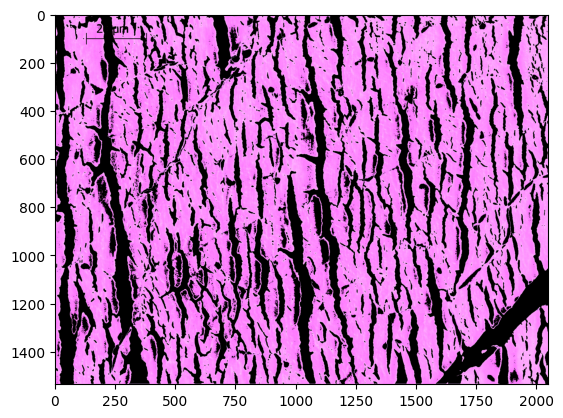

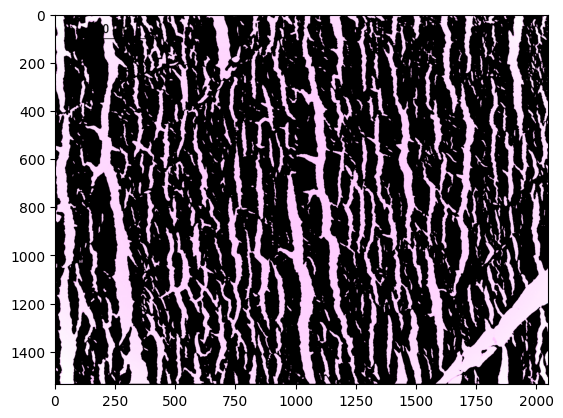

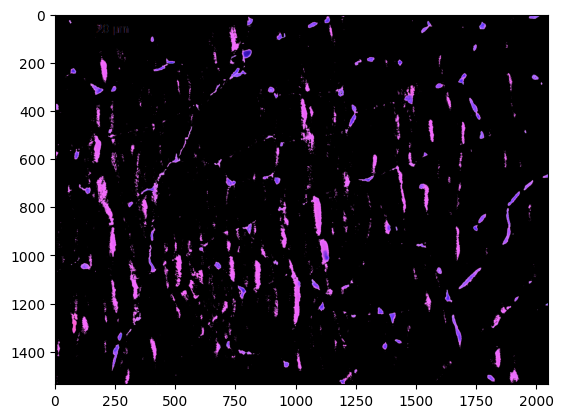

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('RawData/Rato1FDControle7.jpg')

# Show clusters and black pixels that are not in the cluster
mini_y_kmeans = mini_kmeans_model.predict(validation_img)

for i in range(0, cluster_num):
    img_compressed = validation_img.copy()
    img_compressed[mini_y_kmeans != i] = [0, 0, 0]
    img_compressed = img_compressed.reshape(img.shape)

    plt.imshow(img_compressed)
    plt.show()

## Validation

In [61]:
from PIL import Image
import pandas as pd
import numpy as np

folder = 'validation/especialista/'

especialista = []
for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = np.array(img)
        img = img.reshape(-1, 3)

        # Count black pixels
        black = (img == [0, 0, 0]).all(axis=1).sum()
        total = len(img)

        print(f"{filename}: {black / total}")
        especialista.append(black / total)

1.jpg: 0.464193124316067
2.jpg: 0.9167382730737876
3.jpg: 0.131630936905575
4.jpg: 0.6716387218072722
5.jpg: 0.11591424857338005
6.jpg: 0.5912853166472044
7.jpg: 0.5334567166809879
8.jpg: 1.0
9.jpg: 0.0
10.jpg: 0.0


In [63]:
from PIL import Image
import pandas as pd
import numpy as np

folder = 'validation/especialista/'

mini_ans = []
for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = np.array(img)
        img = img.reshape(-1, 3)

        # Kmeans
        mini_y_kmeans = mini_kmeans_model.predict(img)

        # Append the percentage of class 1
        print(f"{filename}: {(mini_y_kmeans == 2).sum() / len(mini_y_kmeans)}")
        mini_ans.append((mini_y_kmeans == 2).sum() / len(mini_y_kmeans))

1.jpg: 0.6422911112579961
2.jpg: 0.9285404778167022
3.jpg: 0.20106344694883263
4.jpg: 0.9034819074478008
5.jpg: 0.18956235632817034
6.jpg: 0.6401980008959981
7.jpg: 0.6667915188636981
8.jpg: 1.0
9.jpg: 0.0
10.jpg: 0.18308473057630306


In [1]:
especialista = np.array(especialista)
kmeans_ans = np.array(kmeans_ans)
mini_ans = np.array(mini_ans)

# Grouped bar chart of especialista and kmeans
import matplotlib.pyplot as plt

# Size
plt.figure(figsize=(12, 5))

barWidth = 0.25
r1 = np.arange(len(especialista))
r2 = [x + barWidth for x in r1]

plt.bar(r1, especialista, color='#7934E0', width=barWidth, label='Especialista')
plt.bar(r2, kmeans_ans, color='#FEE0FE', width=barWidth, label='K-Means')
plt.bar([x + barWidth for x in r2], mini_ans, color='#FD94FD', width=barWidth, label='Mini Batch K-Means')

plt.xlabel('Imagem', fontweight='bold')
plt.ylabel('Porcentagem de tecido conjuntivo', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(especialista))], os.listdir(folder))
plt.legend()
plt.show()

NameError: name 'np' is not defined

In [75]:
# Accuracy of KMeans compared to Especialista
from sklearn.metrics import r2_score

print(f"R2 K-Means: {r2_score(especialista, kmeans_ans)}")
print(f"R2 Mini: {r2_score(especialista, mini_ans)}")

R2 K-Means: 0.9078885424756273
R2 Mini: 0.8768166978887177


## Speed test

In [85]:
# Speed test
import time

start = time.time()

# Predict all images inside /speedtesting
folder = 'speedtesting/'

for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = np.array(img)
        img = img.reshape(-1, 3)

        y_kmeans = mini_kmeans_model.predict(img)
        print(y_kmeans)

end = time.time()

print(f"Time Mini K-Means: {end - start}")

[2 2 2 ... 1 1 1]
[1 1 1 ... 0 0 0]
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[0 0 0 ... 2 2 2]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[0 0 0 ... 1 1 1]
[2 2 0 ... 1 1 1]
[1 1 1 ... 1 1 1]
[0 0 2 ... 2 2 2]
[1 1 1 ... 0 0 0]
Time Mini K-Means: 2.6211040019989014


# KNN

In [2]:
from PIL import Image
import numpy as np
import os

folder = 'training/'

X = []

for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = img.resize((512, 512))
        img = np.array(img)
        X.append(img)

X = np.array(X)
X = X.reshape(-1, 3)

In [3]:
from sklearn.neighbors import NearestNeighbors

#KNeighbors
knn_model = NearestNeighbors(n_neighbors=1, algorithm='auto')

knn_model.fit(X)

NearestNeighbors(n_neighbors=1)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('RawData/Rato1FDControle7.jpg')
validation_img = img.reshape(-1, 3)

# Show clusters and black pixels that are not in the cluster
distances, indices = knn_model.kneighbors(validation_img)

print(distances)
print()
print(indices)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]

[[     538]
 [     538]
 [     538]
 ...
 [ 6818816]
 [22848474]
 [23377183]]


# DBSCAN

In [16]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('RawData/Rato1FDControle1.jpg')
img = img.resize((512, 512))
img = np.array(img)
X = img.reshape(-1, 3)

#DBSCAN
dbscan_model = DBSCAN(eps=5, min_samples=100)

dbscan_model.fit(X)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = Image.open('RawData/Rato1FDControle7.jpg')
img = img.resize((512, 512))
img = np.array(img)
validation_img = img.reshape(-1, 3)

# Show clusters and black pixels that are not in the cluster
y_dbscan = dbscan_model.fit_predict(validation_img)

for i in range(0, len(set(y_dbscan))):
    img_compressed = validation_img.copy()
    img_compressed[y_dbscan != i] = [0, 0, 0]
    img_compressed = img_compressed.reshape(img.shape)

    plt.imshow(img_compressed)
    plt.show()


MemoryError: 

Depois de várias tentativas, concluí que é inviável deivdo à dimensionalidade dos dados e à falta de controle sobre a quantidade de clusters

# Affinity Propagation

In [24]:
# Load Rato1FDControle7 to fit the model
from PIL import Image
import numpy as np

img = Image.open('RawData/Rato1FDControle7.jpg')
img = img.resize((16, 16))
img = np.array(img)
X = img.reshape(-1, 3)

C:\Users\phaa2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


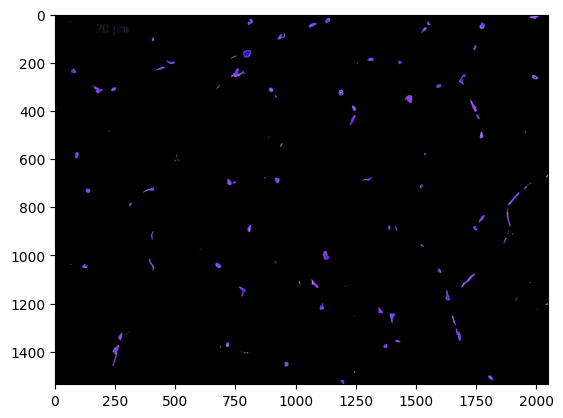

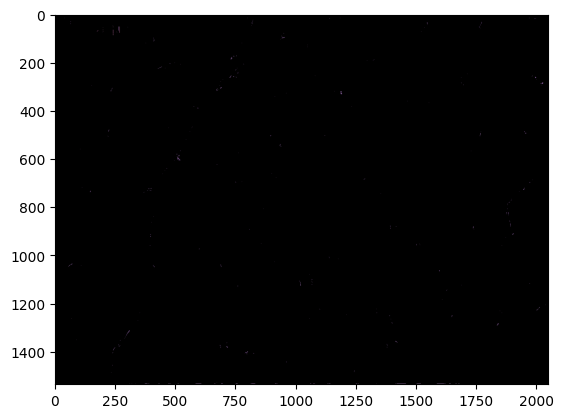

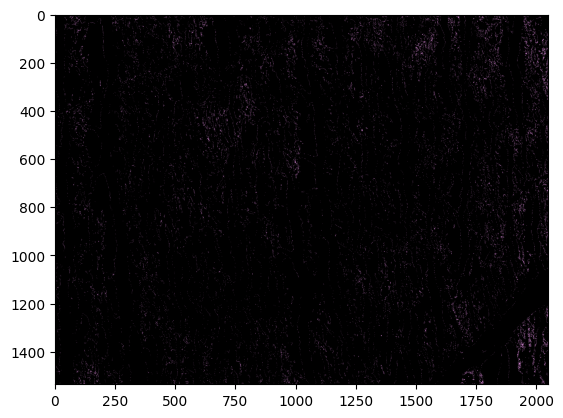

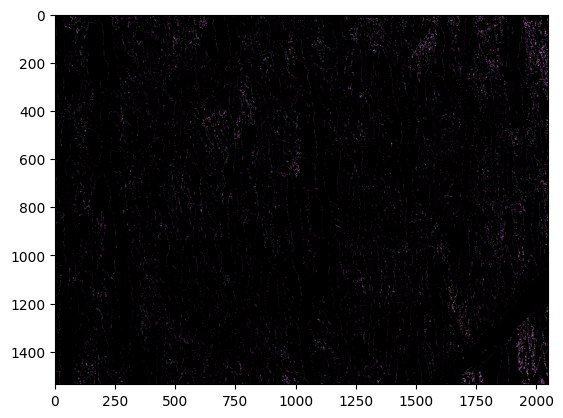

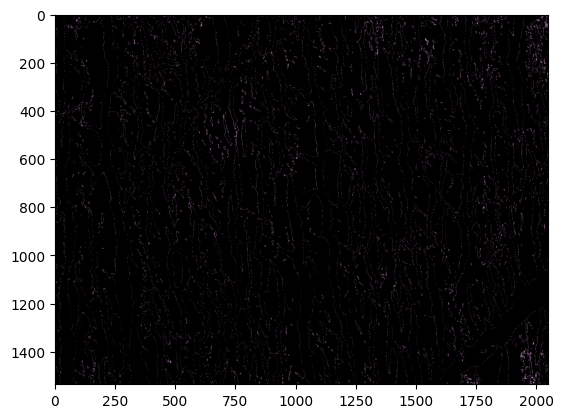

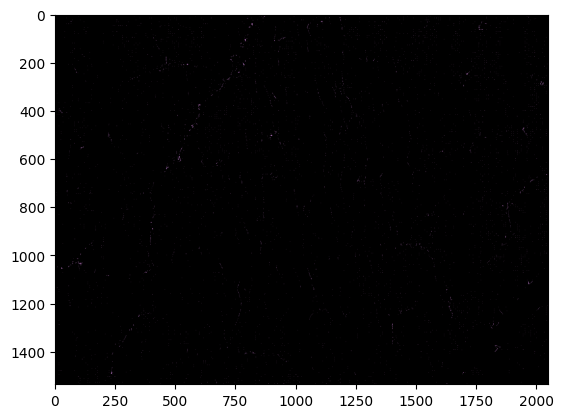

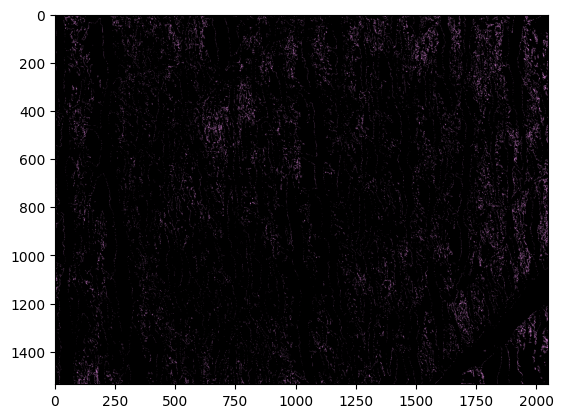

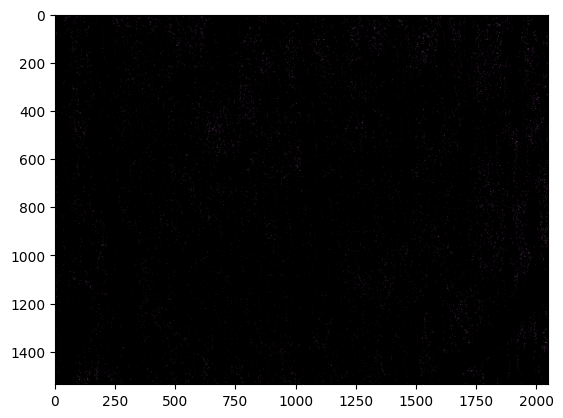

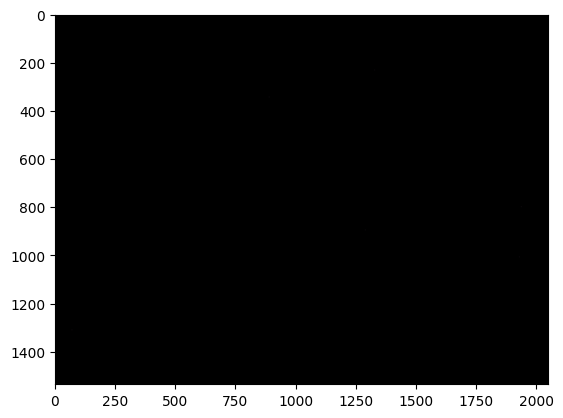

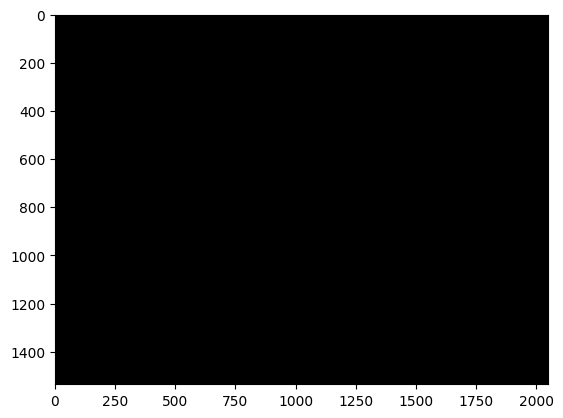

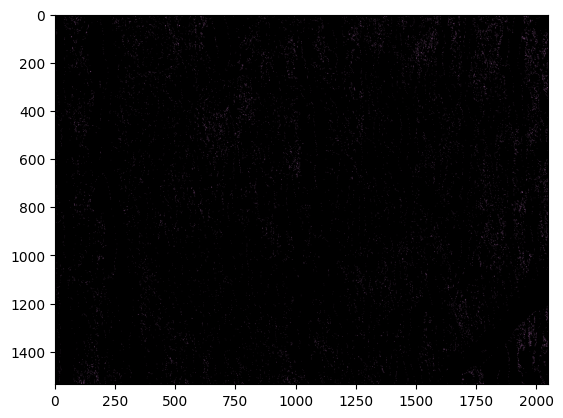

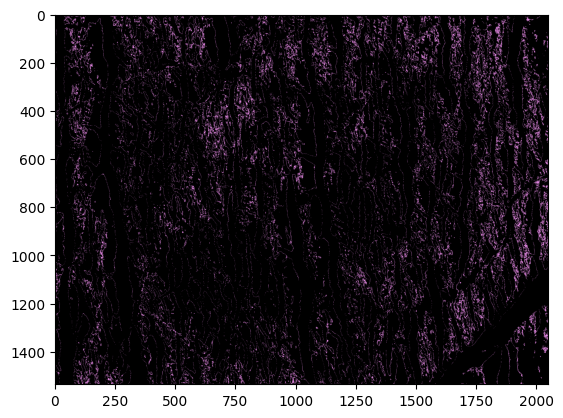

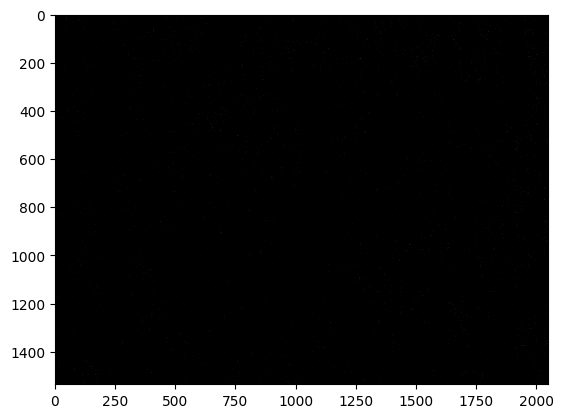

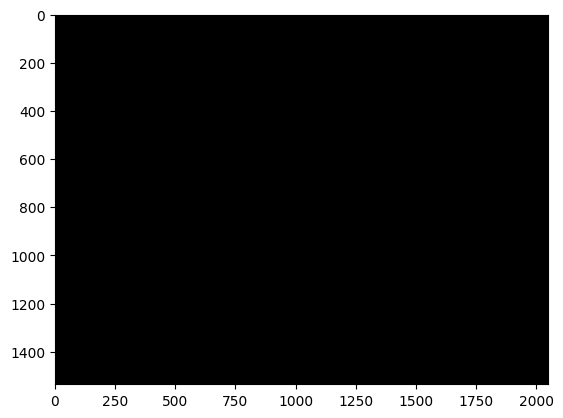

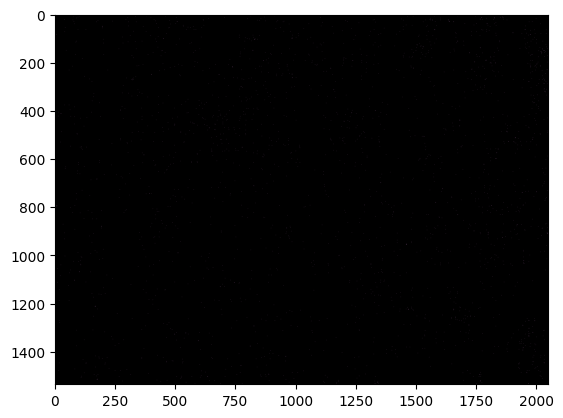

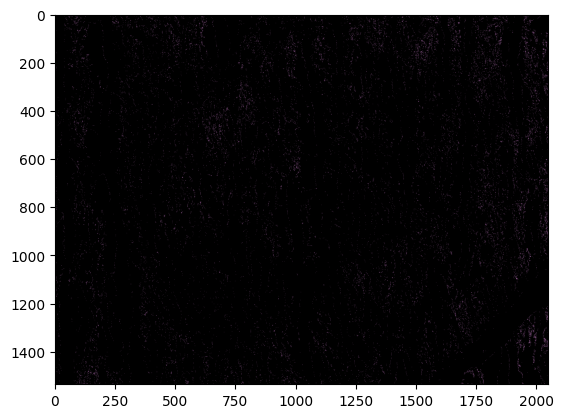

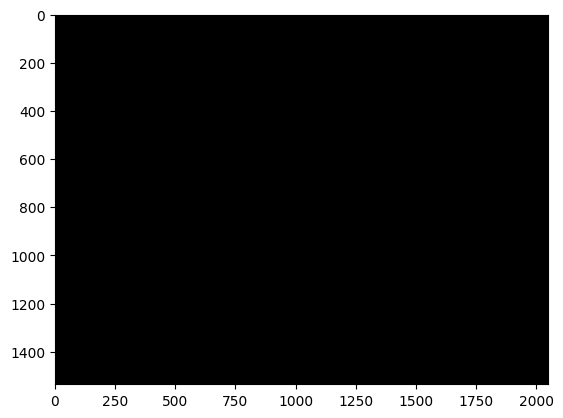

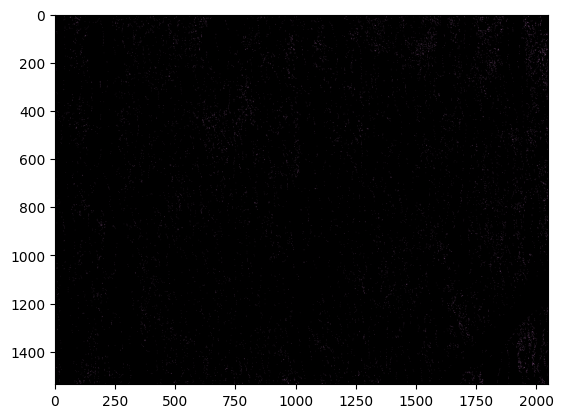

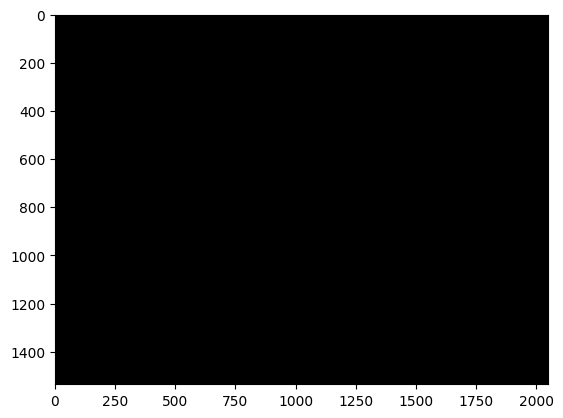

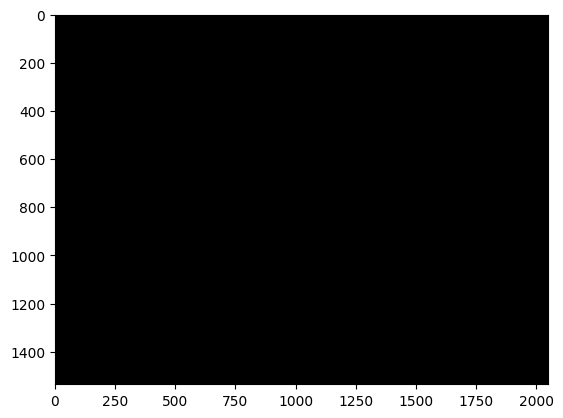

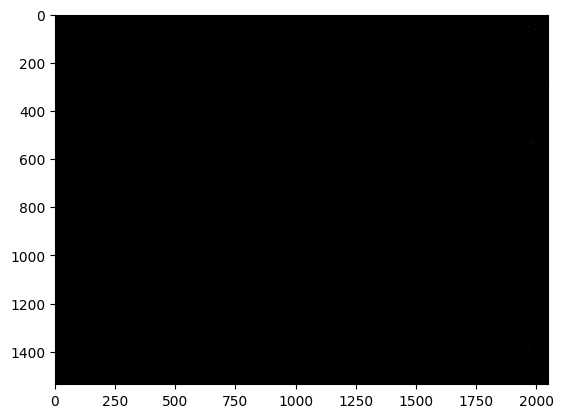

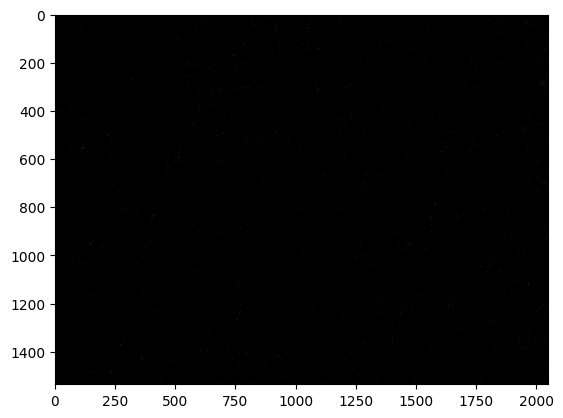

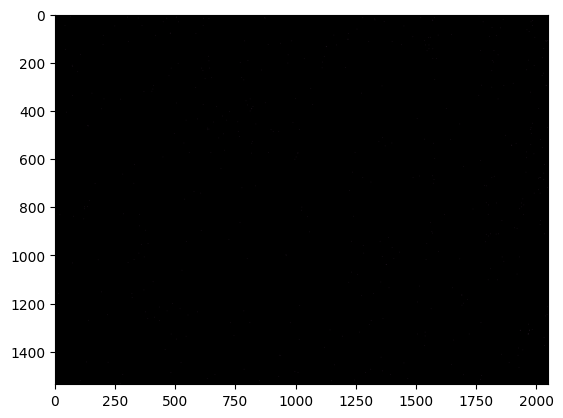

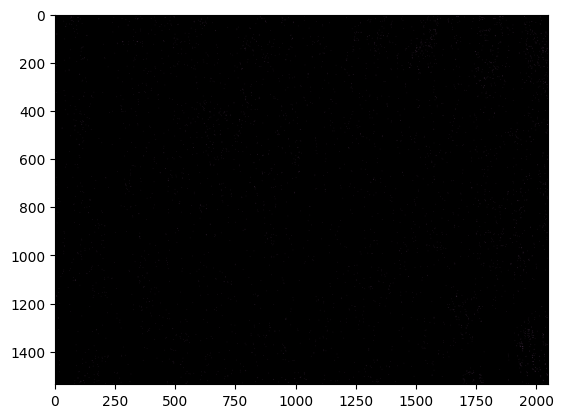

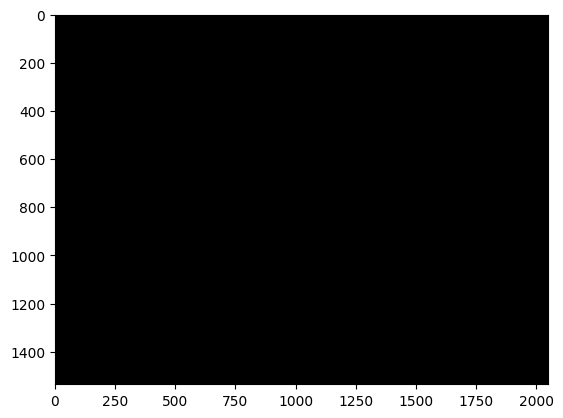

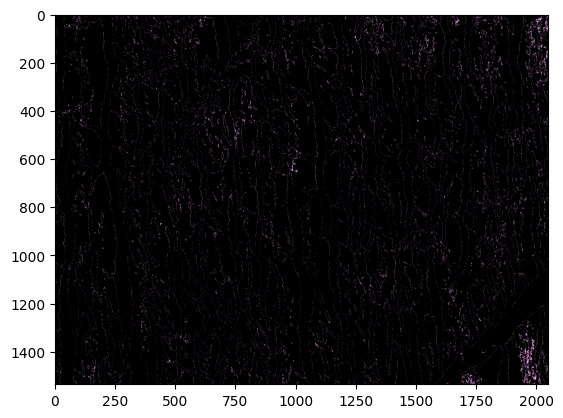

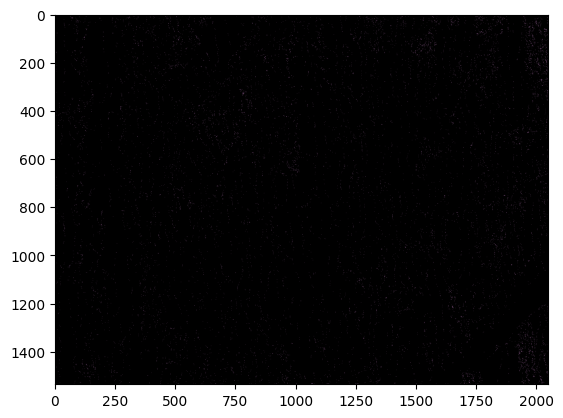

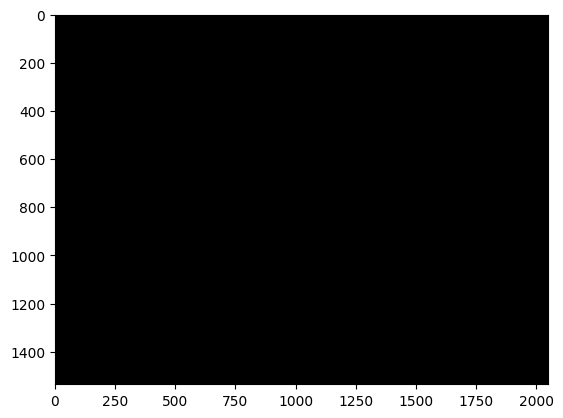

In [27]:
from sklearn.cluster import AffinityPropagation

# AffinityPropagation
affinity_model = AffinityPropagation(preference=-100)

affinity_model.fit(X)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = Image.open('RawData/Rato1FDControle7.jpg')
img = np.array(img)
validation_img = img.reshape(-1, 3)

# Show clusters and black pixels that are not in the cluster
y_affinity = affinity_model.predict(validation_img)

for i in range(0, len(set(y_affinity))):
    img_compressed = validation_img.copy()
    img_compressed[y_affinity != i] = [0, 0, 0]
    img_compressed = img_compressed.reshape(img.shape)

    plt.imshow(img_compressed)
    plt.show()

Descartado pois não possibilita que seja escolhido um número de clusters previamente, sendo preciso setar isso através de um brute force dos hiperparâmetros. Mesmo com um *preference* muito pequeno ainda são gerados vários clusters

# Birch Clustering

## Testing

In [33]:
# Load Rato1FDControle7 to fit the model
from PIL import Image
import numpy as np

img = Image.open('RawData/Rato1FDControle7.jpg')
img = np.array(img)
X = img.reshape(-1, 3)

In [34]:
from sklearn.cluster import Birch

# Birch
birch_model = Birch(n_clusters=3)

birch_model.fit(X)

Birch()

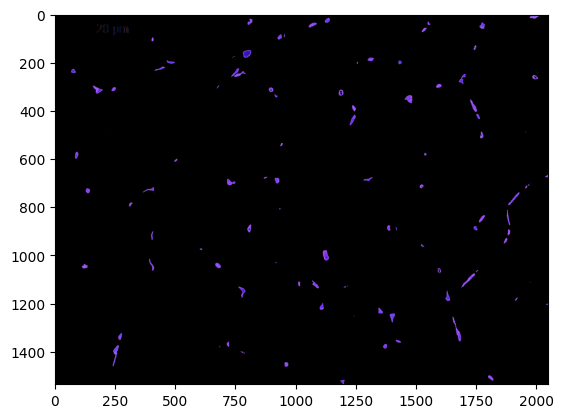

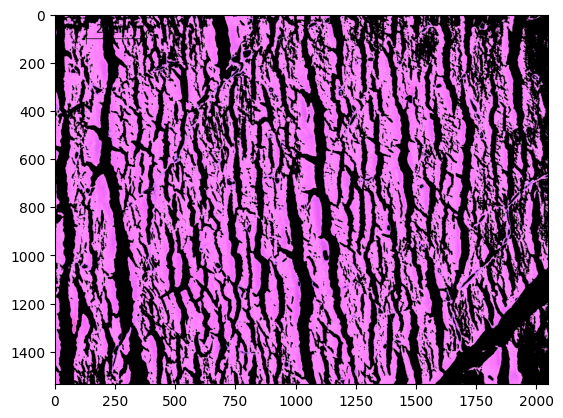

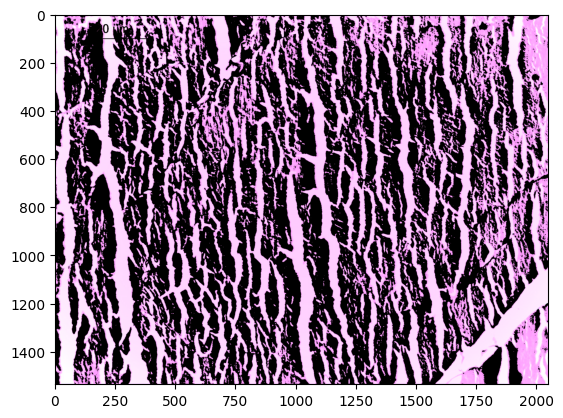

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('RawData/Rato1FDControle7.jpg')
validation_img = img.reshape(-1, 3)

# Show clusters and black pixels that are not in the cluster
y_birch = birch_model.predict(validation_img)

for i in range(0, 3):
    img_compressed = validation_img.copy()
    img_compressed[y_birch != i] = [0, 0, 0]
    img_compressed = img_compressed.reshape(img.shape)

    plt.imshow(img_compressed)
    plt.show()


## Model creation and data fit

In [46]:
# Load all images inside /training folder and reshape them
from PIL import Image
import numpy as np
import os

folder = 'training/'

X = []

for filename in os.listdir(folder):
    if "jpg" in filename:
        img = Image.open(folder + filename)
        img = img.resize((512, 512))
        img = np.array(img)
        X.append(img)

X = np.array(X)
X = X.reshape(-1, 3)

In [47]:
from sklearn.cluster import Birch

# Birch
birch_model = Birch(n_clusters=3)

birch_model.fit(X)

MemoryError: Unable to allocate 1.77 TiB for an array with shape (242807975091,) and data type float64

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('RawData/Rato1FDControle7.jpg')
validation_img = img.reshape(-1, 3)

# Show clusters and black pixels that are not in the cluster
y_birch = birch_model.predict(validation_img)

for i in range(0, 3):
    img_compressed = validation_img.copy()
    img_compressed[y_birch != i] = [0, 0, 0]
    img_compressed = img_compressed.reshape(img.shape)

    plt.imshow(img_compressed)
    plt.show()

# Agglomerative Clustering

In [43]:
# Load Rato1FDControle7 to fit the model
from PIL import Image
import numpy as np

img = Image.open('RawData/Rato1FDControle7.jpg')
img = np.array(img)
X = img.reshape(-1, 3)

In [44]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering
agglomerative_model = AgglomerativeClustering(n_clusters=3)

agglomerative_model.fit(X)

MemoryError: Unable to allocate 36.0 TiB for an array with shape (4947800752128,) and data type float64

Descartado pois é incapaz de carregar uma imagem completa